In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran

24.8 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


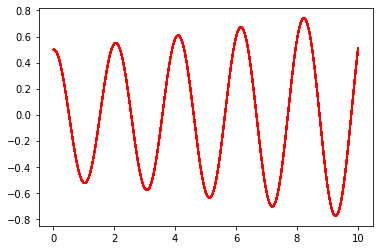

In [44]:
%%timeit #Para obtener el tiempo de ejecución del programa

g = 9.81 #Constantes
l = 1 #Longitud de la cuerda del p

theta = 0.5 #Ángulo inicial (radianes)
omega = 0 #Frecuencia ángular inicial
t0 = 0 #Tiempo inicial (segundos)
tf = 10 #Tiempo final (segundos)
h = 0.01 #Incremento
datos_t0 = [] #Arreglos vacíos para guardar los valores de tiempo y ángulo del péndulo
datos_theta = []

def euler(theta, omega, h):
    dtheta = omega*h
    domega = -(g/l)*np.sin(theta)*h
    theta = theta + dtheta
    omega = omega + domega
    return (theta, omega)
    
while t0 < tf:
    (theta, omega) = euler(theta, omega, h)
    t0 = t0 + h
    datos_t0.append(t0)
    datos_theta.append(theta)

plt.plot(datos_t0, datos_theta, 'r')
plt.show

2.- Reescribe dicho código aprovechando el manejo de arreglos de numpy.

24.3 ms ± 509 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


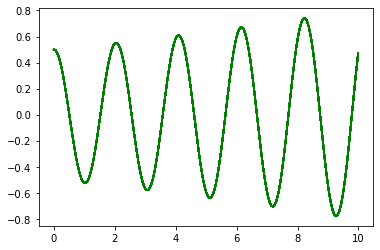

In [46]:
%%timeit #Para obtener el tiempo de ejecución del programa

g = 9.81 #Constantes
l = 1 #Longitud de la cuerda del péndulo

theta = 0.5 #Ángulo inicial
omega = 0 #Frecuencia ángular inicial
t0 = 0 #Tiempo inicial
tf = 10 #Tiempo final
h = 0.01 #Incremento
t = np.arange(t0, tf, h) #Arreglo de números de tiempo inicial a tiempo final en base al incremento
datos_theta = np.zeros(1000) #Creamos dos arreglos para los datos del ángulo y de la frecuencia, llenos de ceros que llenaremos luego en un ciclo for
datos_omega = np.zeros(1000)
datos_theta[0] = theta #Asignamos los valores iniciales al primer elemento de los arreglos
datos_omega[0] = omega

for i in range(999):
    dtheta = datos_omega[i]*h
    domega = -(g/l)*np.sin(datos_theta[i])*h
    datos_theta[i+1] = datos_theta[i] + dtheta
    datos_omega[i+1] = datos_omega[i] + domega

plt.plot(t, datos_theta, 'g')
plt.show

3.- En ambos casos muestra tus resultados usando tablas y gráficos. Compara los resultados, en terminos de los tiempos de ejecución. Puedes elegir libremente los parámetros para el péndulo.

Ya se ha hecho esto de forma individual en ambos programas. Se reporta un tiempo de 24.8 ms ± 1.23 ms por loop en el programa sin el uso de arreglos de numpy, mientras que en el programa optimizado con arreglos de NumPy tenemos un tiempo de 24.3 ms ± 509 µs por loop (Usando los mismos parámetros en ambos casos).